# Customer Churn Analysis

Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [655]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [656]:
df=pd.read_csv('Customer Churn Analysis.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5093,2676-SSLTO,Male,0.0,No,No,49.0,Yes,Yes,DSL,No,...,No,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),66.15,3199,No
5094,6266-QHOJZ,Female,0.0,No,No,65.0,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,No,One year,Yes,Electronic check,89.85,5844.65,No
5095,7269-JISCY,Female,0.0,No,No,55.0,Yes,No,DSL,No,...,No,No,No,No,One year,No,Bank transfer (automatic),45.05,2462.6,No
5096,0363-SVHYR,Male,0.0,Yes,Yes,71.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),86.85,6263.8,No


In [657]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Churn is our target column.

In [658]:
# checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5098 entries, 0 to 5097
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5098 non-null   object 
 1   gender            5097 non-null   object 
 2   SeniorCitizen     5097 non-null   float64
 3   Partner           5097 non-null   object 
 4   Dependents        5097 non-null   object 
 5   tenure            5097 non-null   float64
 6   PhoneService      5097 non-null   object 
 7   MultipleLines     5097 non-null   object 
 8   InternetService   5097 non-null   object 
 9   OnlineSecurity    5097 non-null   object 
 10  OnlineBackup      5097 non-null   object 
 11  DeviceProtection  5097 non-null   object 
 12  TechSupport       5097 non-null   object 
 13  StreamingTV       5097 non-null   object 
 14  StreamingMovies   5097 non-null   object 
 15  Contract          5097 non-null   object 
 16  PaperlessBilling  5097 non-null   object 


In [659]:
# Removing Customer ID
df.drop('customerID',axis=1,inplace=True)

In [660]:
print('Dataset have',df.shape[0],'rows and',df.shape[1],'columns')

Dataset have 5098 rows and 20 columns


# Checking Data Types

In [661]:
df.dtypes

gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can observe that tha "Total Charges" has continous data but it is an object type. Let us handle this column.

In [662]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '2462.6', '6263.8', nan],
      dtype=object)

In [663]:
df['TotalCharges'].nunique()

4798

In [664]:
df.shape

(5098, 20)

In [665]:
df.loc[df['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0.0,Yes,Yes,0.0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0.0,No,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0.0,Yes,Yes,0.0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0.0,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0.0,Yes,Yes,0.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0.0,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No


In [666]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [667]:
 # converting the column datatype from object to float
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [668]:
df['TotalCharges'].dtypes

dtype('float64')

Now we can see total charges columns has some space values which is replaced by nan values Now we can handle the nan values

Handling the nan values and replacing it with the mean of the column.As the column is continous in nature

# Checking Missing / Null values in the dataset

In [669]:
#lets check for null values
df.isnull().sum()

gender              1
SeniorCitizen       1
Partner             1
Dependents          1
tenure              1
PhoneService        1
MultipleLines       1
InternetService     1
OnlineSecurity      1
OnlineBackup        1
DeviceProtection    1
TechSupport         1
StreamingTV         1
StreamingMovies     1
Contract            1
PaperlessBilling    1
PaymentMethod       1
MonthlyCharges      1
TotalCharges        9
Churn               1
dtype: int64

In [670]:
df.isnull().sum().sum()

28

There are null values present in the dataset.

<AxesSubplot:>

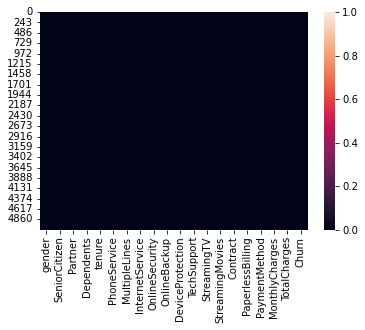

In [671]:
sns.heatmap(df.isnull())

# Filling Categorical Columns missing values with mode

In [672]:
df.dtypes[df.dtypes == 'object'] #Identifying the Categorical Columns

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Churn               object
dtype: object

# 'Churn' vs Categorical Data Columns

In [673]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)
df['Partner'].fillna(df['Partner'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['PhoneService'].fillna(df['PhoneService'].mode()[0],inplace=True)
df['MultipleLines'].fillna(df['MultipleLines'].mode()[0],inplace=True)
df['InternetService'].fillna(df['InternetService'].mode()[0],inplace=True)
df['OnlineSecurity'].fillna(df['OnlineSecurity'].mode()[0],inplace=True)
df['OnlineBackup'].fillna(df['OnlineBackup'].mode()[0],inplace=True)
df['DeviceProtection'].fillna(df['DeviceProtection'].mode()[0],inplace=True)
df['TechSupport'].fillna(df['TechSupport'].mode()[0],inplace=True)
df['StreamingTV'].fillna(df['StreamingTV'].mode()[0],inplace=True)
df['StreamingMovies'].fillna(df['StreamingMovies'].mode()[0],inplace=True)
df['Contract'].fillna(df['Contract'].mode()[0],inplace=True)
df['PaperlessBilling'].fillna(df['PaperlessBilling'].mode()[0],inplace=True)
df['PaymentMethod'].fillna(df['PaymentMethod'].mode()[0],inplace=True)
df['Churn'].fillna(df['Churn'].mode()[0],inplace=True)

# Filling Continuous Columns missing values with mean

In [674]:
df.dtypes[df.dtypes=='float64']

SeniorCitizen     float64
tenure            float64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [675]:
df['tenure'] = df['tenure'].fillna(df['tenure'].mean())
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean())
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
df['SeniorCitizen'] = df['SeniorCitizen'].fillna(df['SeniorCitizen'].median())

# Checking null values again

In [676]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

All the null values have been replaced now

In [677]:
#lets print out the columns with unique values
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,len(pd.unique(df[i])))

gender 2
Partner 2
Dependents 2
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
Churn 2


# Statistical Summary

In [678]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5098.0,0.159474,0.366154,0.00,0.00,0.000,0.0000,1.00
tenure,5098.0,32.237591,24.604389,0.00,9.00,28.000,55.0000,72.00
MonthlyCharges,5098.0,64.726476,30.155178,18.25,35.40,70.375,89.9500,118.75
TotalCharges,5098.0,2271.073521,2263.899757,18.80,389.95,1397.950,3723.2125,8684.80


# Exploratory Data Analysis (EDA)

No     3761
Yes    1337
Name: Churn, dtype: int64


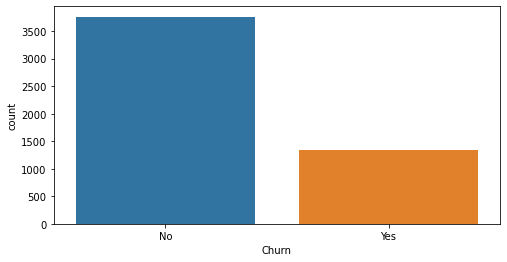

In [679]:
print(df['Churn'].value_counts())

plt.figure(figsize = [8,4])
sns.countplot(df['Churn'])
plt.show()

0.0    4285
1.0     813
Name: SeniorCitizen, dtype: int64


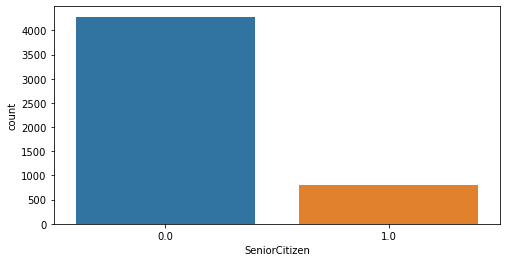

In [680]:
print(df['SeniorCitizen'].value_counts())

plt.figure(figsize = [8,4])
sns.countplot(df['SeniorCitizen'])
plt.show()

Male      2578
Female    2520
Name: gender, dtype: int64


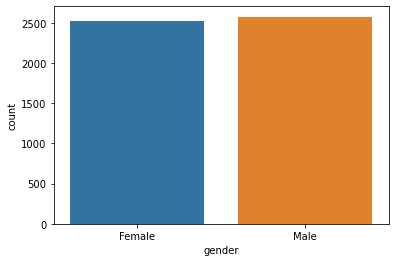

In [681]:
#Using countplot for nominal data
sns.countplot(x='gender', data=df)
print(df['gender'].value_counts())

The number of Male and Female customers are almsot equal

No     2642
Yes    2456
Name: Partner, dtype: int64


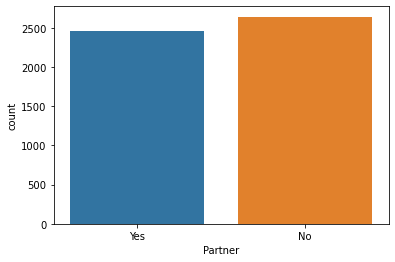

In [682]:
#Using countplot for nominal data
sns.countplot(x='Partner', data=df)
print(df['Partner'].value_counts())

No     3587
Yes    1511
Name: Dependents, dtype: int64


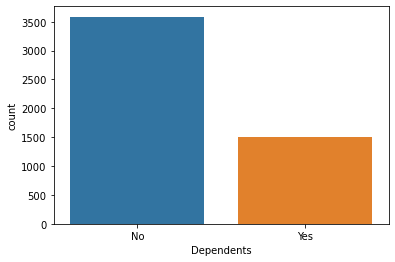

In [683]:
#Using countplot for nominal data
sns.countplot(x='Dependents', data=df)
print(df['Dependents'].value_counts())

Yes    4624
No      474
Name: PhoneService, dtype: int64


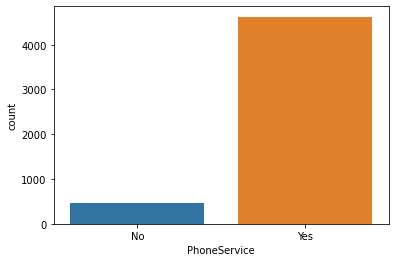

In [684]:
#Using countplot for nominal data
sns.countplot(x='PhoneService', data=df)
print(df['PhoneService'].value_counts())

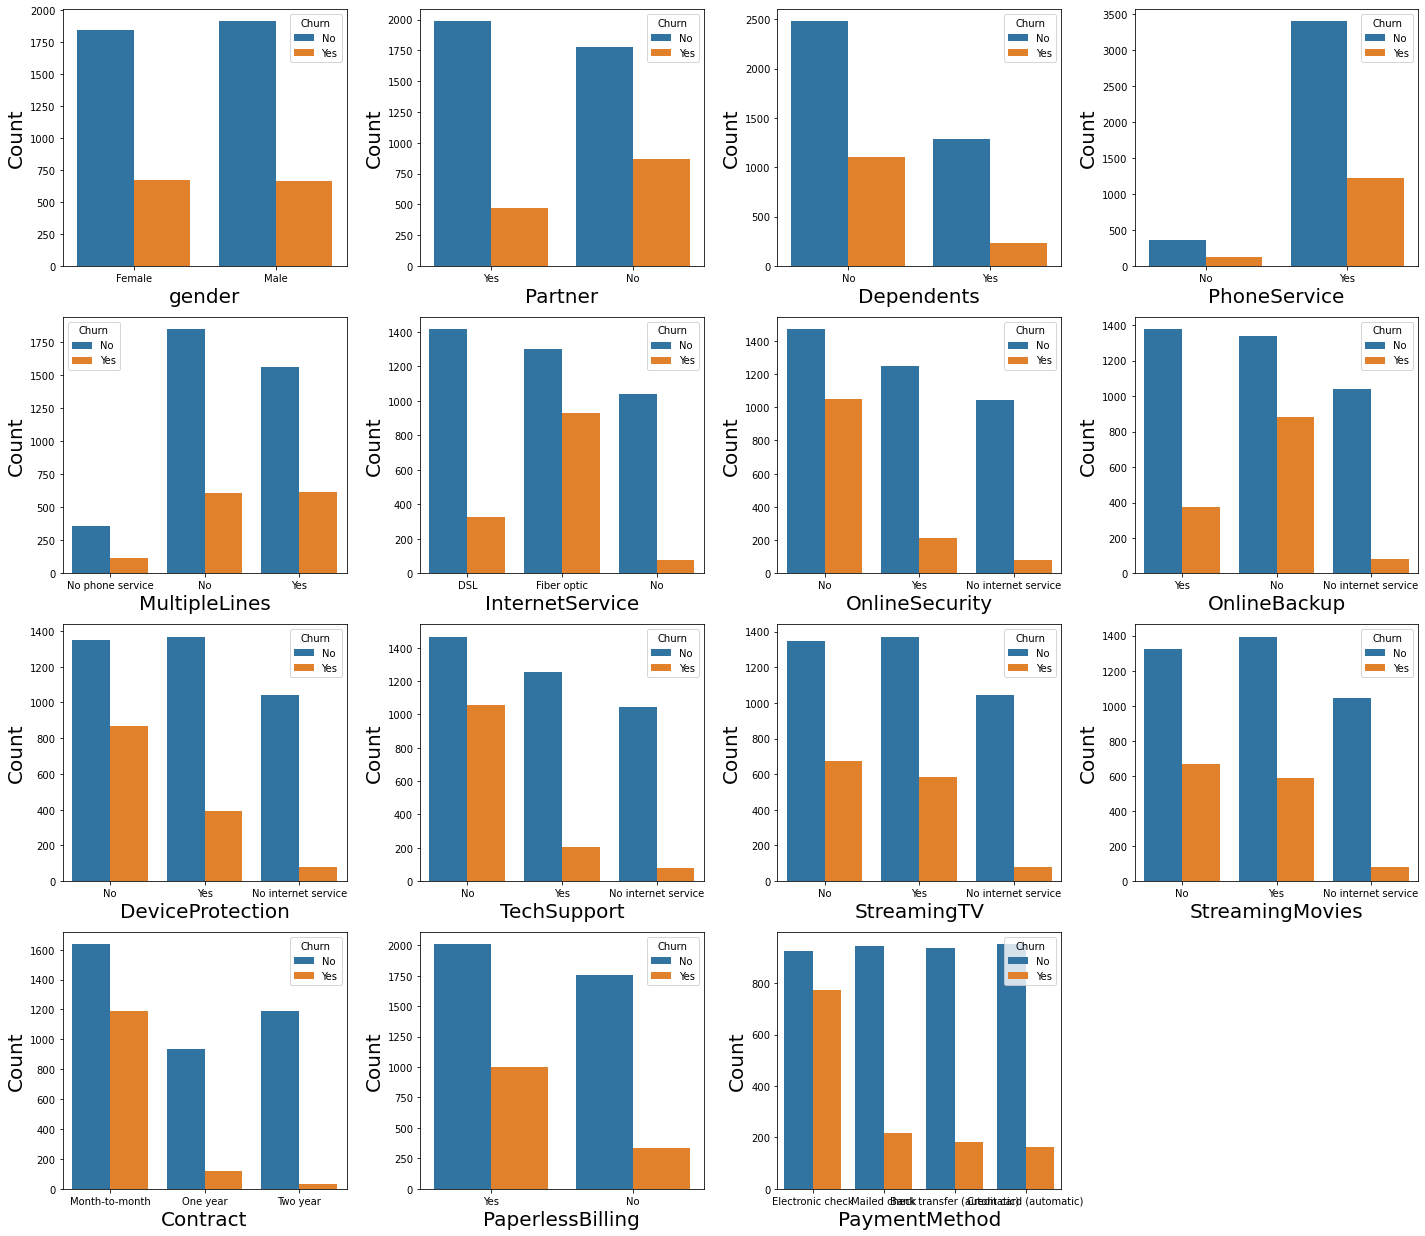

In [685]:
plt.figure(figsize=(20,21),facecolor='white')
plotnum=1
X = df[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]
y = df['Churn']
for col in X:
    if plotnum<=23:
        plt.subplot(5,4,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

In [686]:
df.dtypes[df.dtypes=='float64']

SeniorCitizen     float64
tenure            float64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

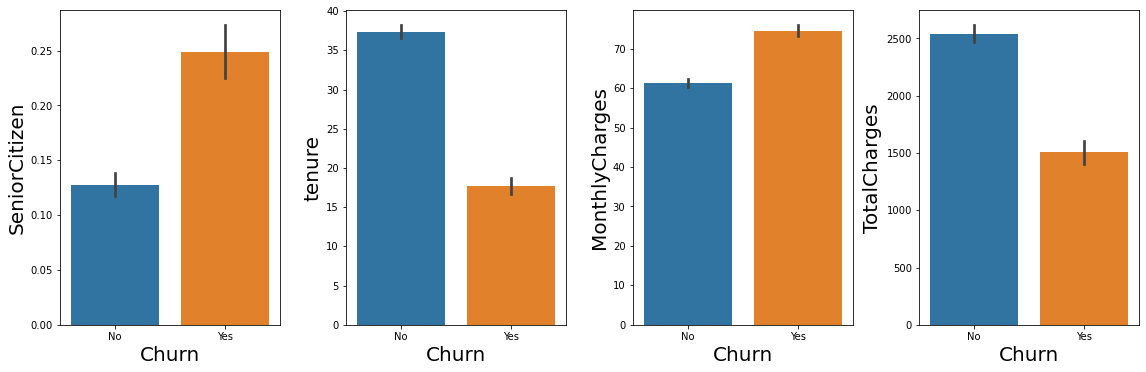

In [687]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df['Churn']
X = df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]
for col in X:
    if plotnum<=15:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Churn',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

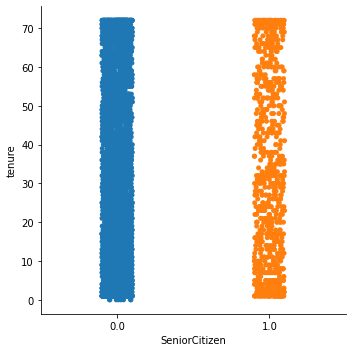

In [688]:
sns.catplot(x="SeniorCitizen",y='tenure',data=df)

In [689]:
x = df.drop(columns = ['Churn'])
y = df['Churn']

In [690]:
df.dtypes[df.dtypes=='float64']

SeniorCitizen     float64
tenure            float64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

# Checking Outliers

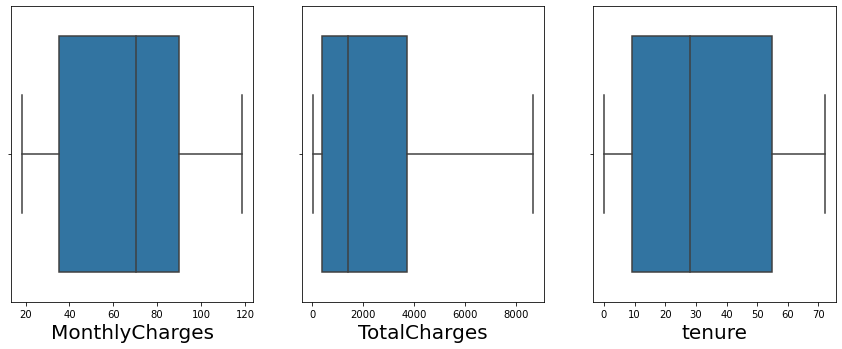

In [691]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['MonthlyCharges','TotalCharges','tenure']]:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

There are no outliers present in the dataset

# Encoding the categorical Feature Columns

In [692]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [693]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [694]:
df.dtypes

gender              float64
SeniorCitizen       float64
Partner             float64
Dependents          float64
tenure              float64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

In [695]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0.0,0.0,0.0,45.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


In [696]:
df['Churn'].unique()

array([0., 1.])

# describe the dataset

In [697]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000
mean,0.505689,0.159474,0.481758,0.296391,32.237591,0.907022,0.944684,0.877991,0.792271,0.907611,0.909965,0.790702,0.986858,0.998627,0.683798,0.590428,1.568458,64.726476,2271.073521,0.262260
std,0.500017,0.366154,0.499716,0.456710,24.604389,0.290430,0.950863,0.739601,0.858547,0.878479,0.878723,0.858166,0.883227,0.883324,0.832709,0.491803,1.067894,30.155178,2263.899757,0.439906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.400000,389.950000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.375000,1397.950000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.950000,3723.212500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot:>

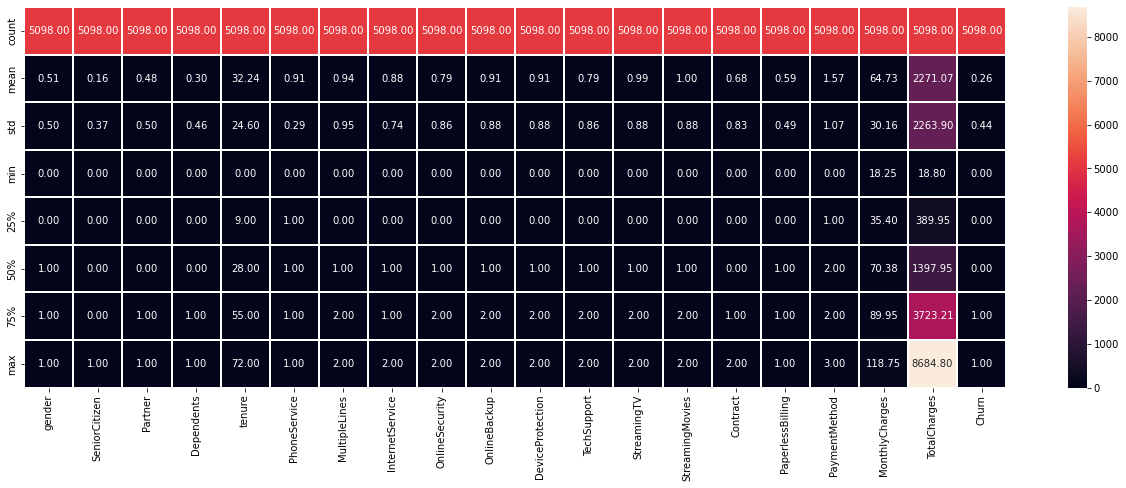

In [698]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='white',fmt="0.2f")

# Finding Correlation

In [699]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.003349,0.003164,0.005932,0.008687,-0.007165,-0.013368,-0.007672,-0.027182,-0.009300,-0.007541,-0.006141,-0.005828,-0.009533,0.003850,-0.009672,0.011212,-0.013255,-0.000322,-0.011689
SeniorCitizen,-0.003349,1.000000,0.003572,-0.197061,0.010167,0.010315,0.139735,-0.041880,-0.129887,-0.020670,-0.007196,-0.150377,0.032569,0.047385,-0.140230,0.155780,-0.036707,0.218124,0.096904,0.145900
Partner,0.003164,0.003572,1.000000,0.459968,0.394335,0.026162,0.137436,0.006717,0.166081,0.153700,0.168052,0.127659,0.149037,0.133506,0.303917,-0.009652,-0.157035,0.095391,0.328946,-0.156283
Dependents,0.005932,-0.197061,0.459968,1.000000,0.163386,0.003682,-0.028651,0.048996,0.155050,0.081957,0.070418,0.133279,0.059269,0.019489,0.238741,-0.113671,-0.032560,-0.107431,0.070682,-0.162372
tenure,0.008687,0.010167,0.394335,0.163386,1.000000,0.010615,0.340168,-0.026600,0.331742,0.374323,0.377369,0.327670,0.297431,0.298587,0.680681,0.010621,-0.378458,0.243686,0.822924,-0.351284
PhoneService,-0.007165,0.010315,0.026162,0.003682,0.010615,1.000000,-0.018627,0.380115,-0.020822,0.014001,0.004092,-0.019843,0.051834,0.042329,-0.002336,0.012174,0.007875,0.239110,0.108397,0.009691
MultipleLines,-0.013368,0.139735,0.137436,-0.028651,0.340168,-0.018627,1.000000,-0.111705,0.008753,0.119069,0.116843,0.015863,0.174110,0.181873,0.116417,0.168447,-0.170936,0.429188,0.449379,0.038910
InternetService,-0.007672,-0.041880,0.006717,0.048996,-0.026600,0.380115,-0.111705,1.000000,-0.032197,0.036095,0.043168,-0.017676,0.102364,0.094341,0.094397,-0.139567,0.085844,-0.333681,-0.181606,-0.050577
OnlineSecurity,-0.027182,-0.129887,0.166081,0.155050,0.331742,-0.020822,0.008753,-0.032197,1.000000,0.192277,0.182470,0.300200,0.068068,0.066110,0.374907,-0.154143,-0.097794,-0.051432,0.261117,-0.290003
OnlineBackup,-0.009300,-0.020670,0.153700,0.081957,0.374323,0.014001,0.119069,0.036095,0.192277,1.000000,0.202968,0.197375,0.149393,0.147744,0.281093,-0.004954,-0.124070,0.120816,0.380257,-0.196208


<AxesSubplot:>

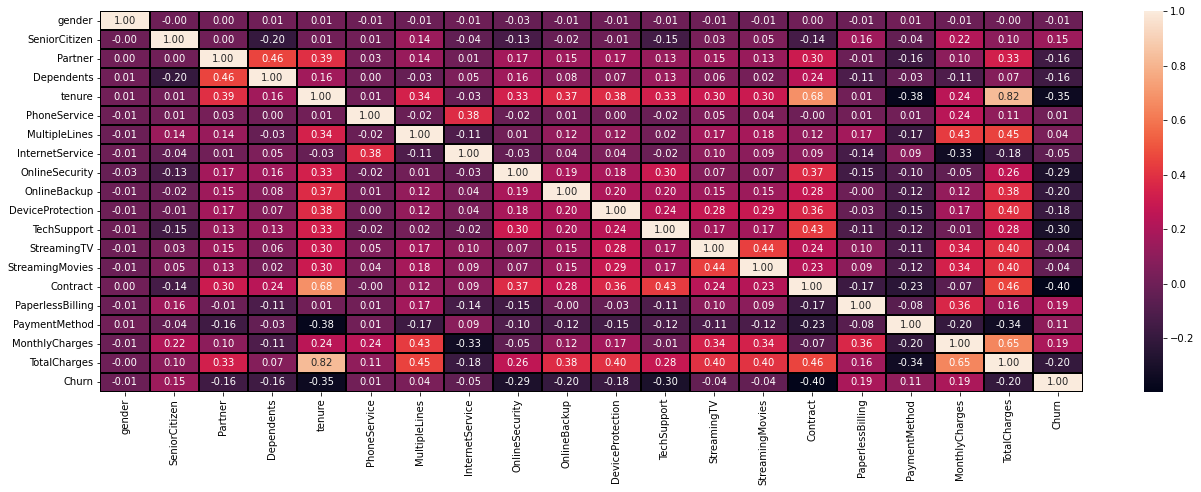

In [700]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt="0.2f")

# Corrleations of the columns with the target columns:

In [701]:
df.corr()['Churn'].sort_values()

Contract           -0.395928
tenure             -0.351284
TechSupport        -0.297357
OnlineSecurity     -0.290003
TotalCharges       -0.200250
OnlineBackup       -0.196208
DeviceProtection   -0.181509
Dependents         -0.162372
Partner            -0.156283
InternetService    -0.050577
StreamingMovies    -0.038455
StreamingTV        -0.037583
gender             -0.011689
PhoneService        0.009691
MultipleLines       0.038910
PaymentMethod       0.110244
SeniorCitizen       0.145900
PaperlessBilling    0.191887
MonthlyCharges      0.194949
Churn               1.000000
Name: Churn, dtype: float64

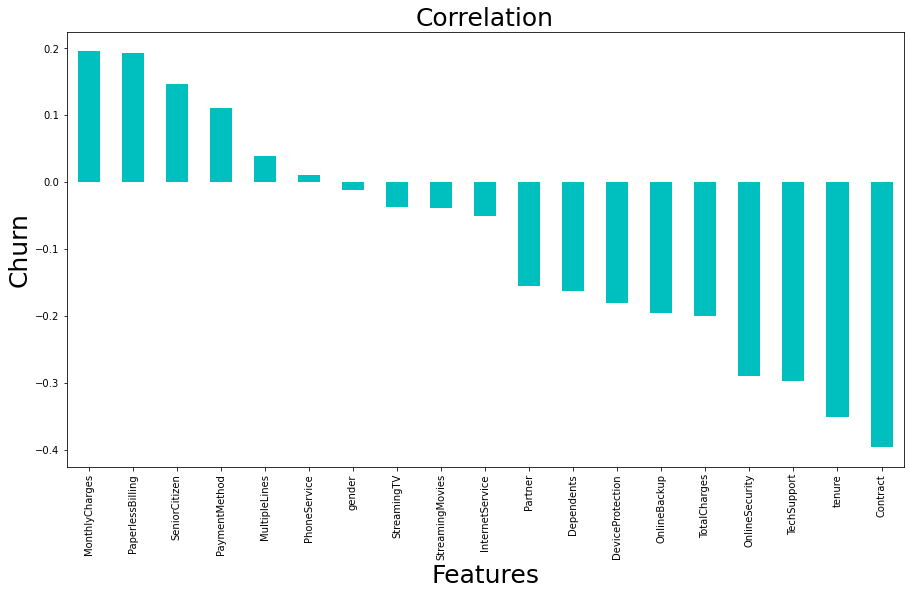

In [702]:
plt.figure(figsize = (15,8))
df.corr()['Churn'].sort_values(ascending = False).drop(['Churn']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=25)
plt.ylabel('Churn',fontsize=25)
plt.title('Correlation',fontsize = 25)
plt.show()

# Checking for Skewness in Data

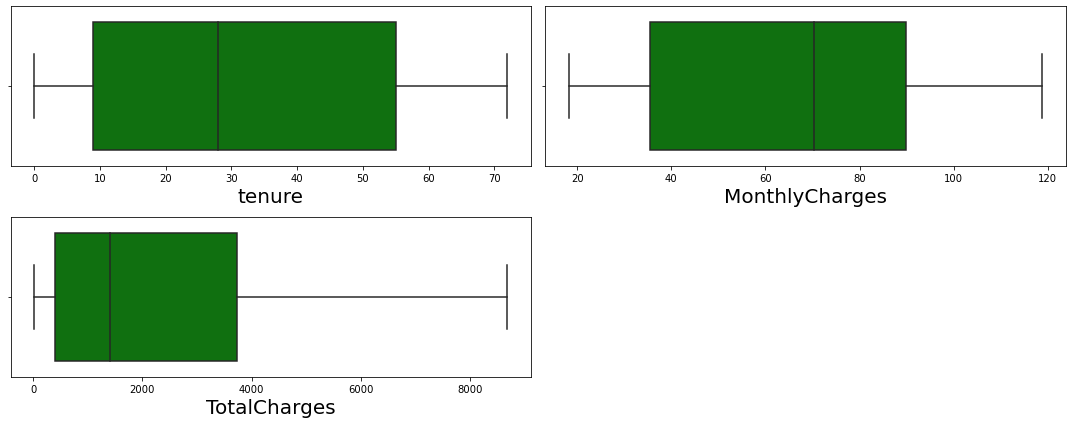

In [703]:
#Let's check if there is any outliers present in our data columns by using box plot method

features = ['tenure','MonthlyCharges','TotalCharges']

plt.figure(figsize = (15,23))
plotnumber = 1

for i in features: #let's visualize only the features columns 
    if plotnumber<=16:
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(df[i],color = 'Green')
        plt.xlabel(i,fontsize = 20)
    plotnumber += 1
plt.tight_layout()

In [704]:
#Let's check the skewness for these columns

df[features].skew()

tenure            0.254619
MonthlyCharges   -0.219733
TotalCharges      0.974062
dtype: float64

Skewness is present in "TotalCharges" column, we need to remove it

# Reducing skewness further using PowerTransformer

In [705]:
from sklearn.preprocessing import PowerTransformer #importing the library

scaler = PowerTransformer(method='yeo-johnson')
    
#applying Power Transformation method for this particular column
df['TotalCharges'] = scaler.fit_transform(df['TotalCharges'].values.reshape(-1,1)) 

In [706]:
#Let's re-check the skewness for these columns

df[features].skew()

tenure            0.254619
MonthlyCharges   -0.219733
TotalCharges     -0.142272
dtype: float64

The skewness is removed

# Over_Sampling the imbalanced target column

In [707]:
# Let's do Standard Scaling(x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df)
x=pd.DataFrame(x,columns=df.columns)
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.011442,-0.435582,1.037175,-0.649033,-1.269719,-3.123343,0.05818,-1.187231,-0.922895,1.243622,-1.035655,-0.921477,-1.117441,-1.130644,-0.821253,0.832879,0.404145,-1.156680,-1.811416,-0.596230
1,0.988687,-0.435582,-0.964157,-0.649033,0.071637,0.320170,-0.99360,-1.187231,1.406850,-1.033263,1.240598,-0.921477,-1.117441,-1.130644,0.379765,-1.200654,1.340659,-0.257907,0.261436,-0.596230
2,0.988687,-0.435582,-0.964157,-0.649033,-1.229072,0.320170,-0.99360,-1.187231,1.406850,1.243622,-1.035655,-0.921477,-1.117441,-1.130644,-0.821253,0.832879,1.340659,-0.360719,-1.383437,1.677204
3,0.988687,-0.435582,-0.964157,-0.649033,0.518755,-3.123343,0.05818,-1.187231,1.406850,-1.033263,1.240598,1.409304,-1.117441,-1.130644,0.379765,-1.200654,-1.468883,-0.743775,0.240421,-0.596230
4,-1.011442,-0.435582,-0.964157,-0.649033,-1.229072,0.320170,-0.99360,0.164982,-0.922895,-1.033263,-1.035655,-0.921477,-1.117441,-1.130644,-0.821253,0.832879,0.404145,0.198112,-1.245180,1.677204


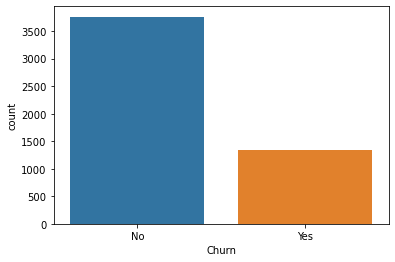

In [708]:
sns.countplot(y)
plt.show()

After applying "Over Sampling Method", the target column "Churn" data class is now balanced

# Feature Selection

In [709]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45,stratify=y)

In [710]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4078, 20), (1020, 20), (4078,), (1020,))

In [711]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.metrics import f1_score, precision_score, recall_score

In [712]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=45)
GNB=GaussianNB()
RFC=RandomForestClassifier(random_state=45)
GBC=GradientBoostingClassifier(random_state=45)
ABC=AdaBoostClassifier(random_state=45)
ETC=ExtraTreesClassifier(random_state=45)

In [713]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

---------------------> KNeighborsClassifier <----------------------


KNeighborsClassifier()


Accuracy_score =  0.9862745098039216


Cross_Val_Score =  0.98469740745021


classification_report
               precision    recall  f1-score   support

          No       0.98      1.00      0.99       752
         Yes       1.00      0.95      0.97       268

    accuracy                           0.99      1020
   macro avg       0.99      0.97      0.98      1020
weighted avg       0.99      0.99      0.99      1020



[[752   0]
 [ 14 254]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)
---------------------> SVC <----------------------


SVC()


Accuracy_score =  1.0


Cross_Val_Score =  1.0


classification_report
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       752
         Yes       1.00      1.00      1.00       268

    accuracy                           1.00      1020
   macro avg       1.00      1.00      1.00      1020
wei

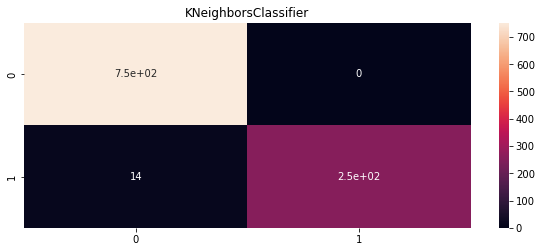

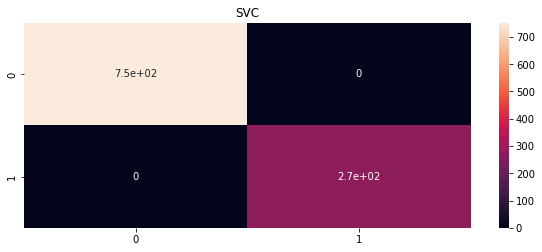

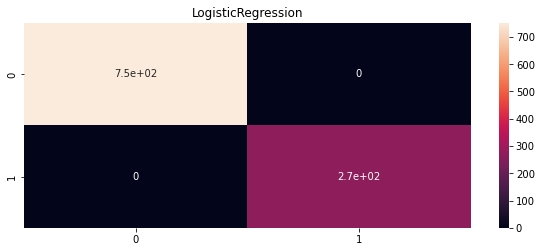

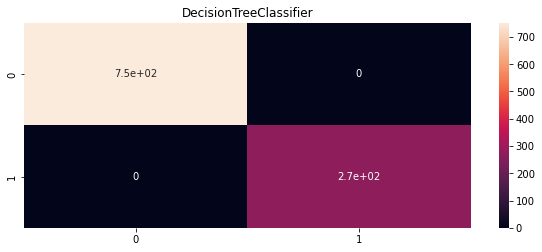

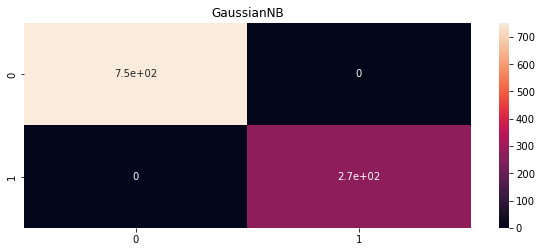

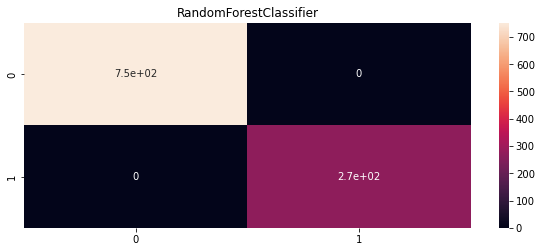

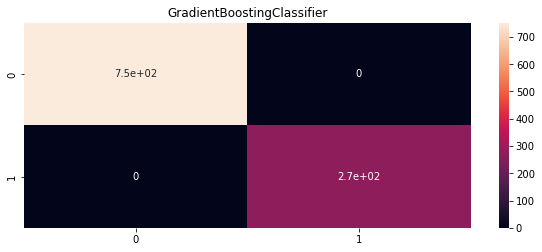

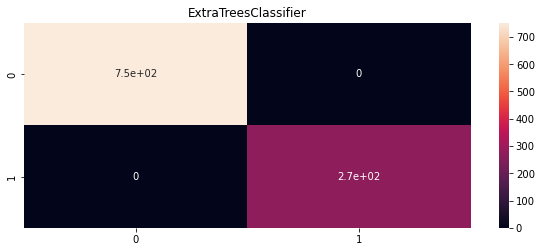

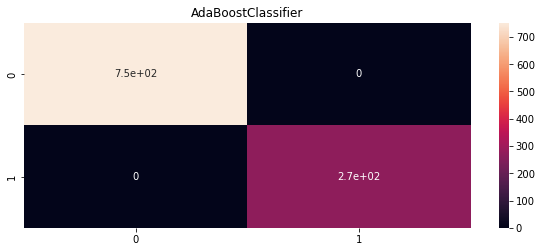

In [724]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('--------------------->',name,'<----------------------')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))

In [717]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':sc})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,0.986275,1.0
1,SVC,1.000000,1.0
2,LogisticRegression,1.000000,1.0
3,DecisionTreeClassifier,1.000000,1.0
4,GaussianNB,1.000000,1.0
5,RandomForestClassifier,1.000000,1.0
6,GradientBoostingClassifier,1.000000,1.0
7,ExtraTreesClassifier,1.000000,1.0
8,AdaBoostClassifier,1.000000,1.0


# Selecting ExtraTreesClassifier as my final model.

In [645]:
import joblib
joblib.dump(ETC,'Customer_Churn.pkl')

['Customer_Churn.pkl']

In [725]:
model=joblib.load('Customer_Churn.pkl')

In [726]:
prediction=model.predict(x_test)

In [727]:
pre = pd.DataFrame(prediction)
pre.columns = ["prediction"]
pre.to_csv("Customer_Churn_results.csv")

In [729]:
#lets make a dataframe of actual answers vs predicted answers
conclusion = pd.DataFrame((model.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019
Predicted,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,Yes,Yes,No,No,Yes,No
Actual,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,Yes,Yes,No,No,Yes,No
